In [142]:
from os import read
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#importar y concatenar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

df_red['type'] = 'red'
df_white['type'] = 'white'

df = pd.concat([df_red, df_white])

df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


**Limpieza de Datos**

In [143]:
#eliminación de valores duplicados
df.duplicated().sum() #1177

df = df.drop_duplicates()

In [144]:
#verificar tipos de datos

#cambiar tipo de columna de Object a Categorical
df['type'] = df['type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 545.6 KB


<ipython-input-144-b0f11c10ee99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].astype('category')


In [145]:
#Corrección de inconsistencias en valores categóricos

#no existen inconsistencias en valores categoricos, ya que la unica columna categorica fue creada automaticamente

In [146]:
#Manejo de valores faltantes adecuadamente
df.isnull().sum() #no existen valores nulos para este dataset

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Exploración de Datos**

In [147]:
#Estadísticas descriptivas (medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) )

descriptiva = df.describe()

moda = df.mode()

df_num = df.drop(columns=df.select_dtypes(include='category').columns)
rango = df_num.max() - df_num.min()

print("ESTADISTICAS DESCRIPTIVAS: \n", descriptiva, "\n")
print("MODA : \n", moda, "\n")
print("RANGO: \n", rango)

ESTADISTICAS DESCRIPTIVAS: 
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000 

**Visualizaciones univariadas y multivariadas**

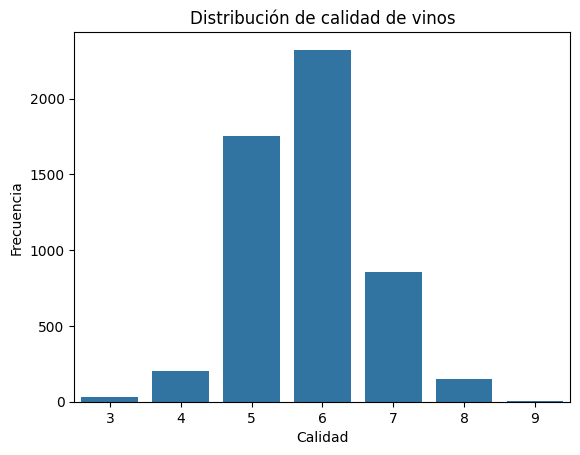

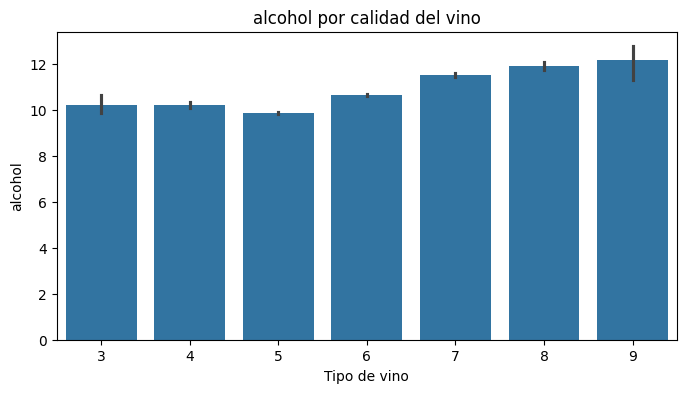

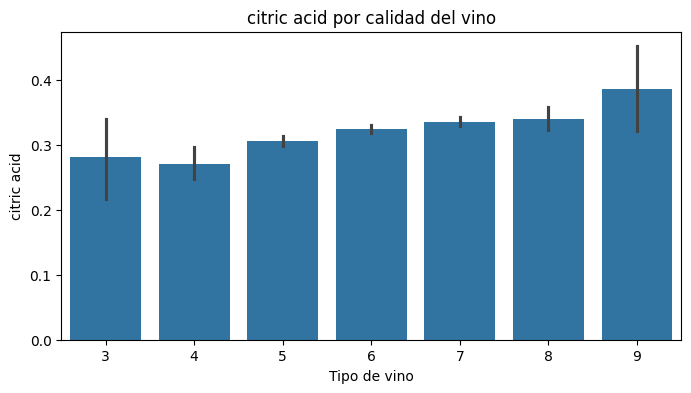

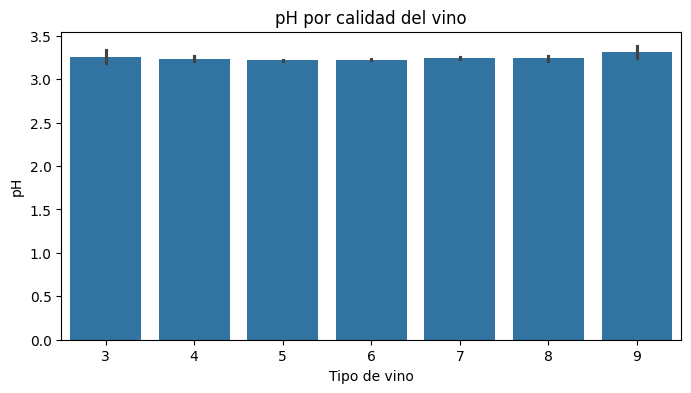

In [148]:
#visualizaciones Univariadas

#vinos por calidad
sns.countplot(data=df, x='quality')
plt.title('Distribución de calidad de vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

#variables por calidad de vino
for i in ['alcohol', 'citric acid', 'pH']:
  plt.figure(figsize=(8, 4))
  sns.barplot(data=df, x='quality', y=i)
  plt.title(f"{i} por calidad del vino")
  plt.xlabel("Tipo de vino")
  plt.ylabel(i)
  plt.show()

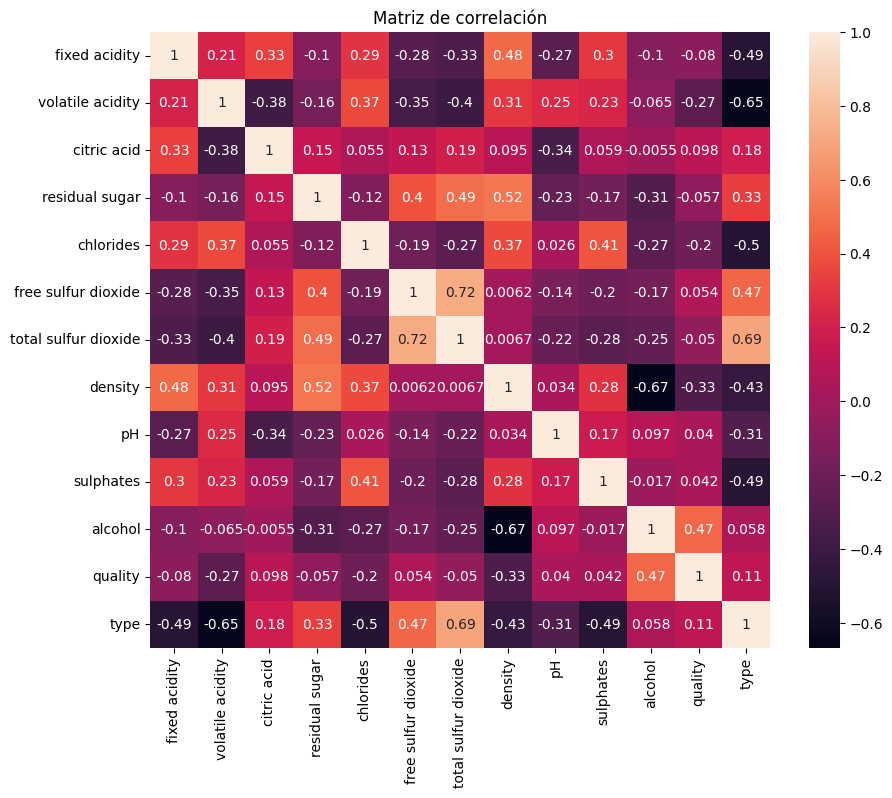

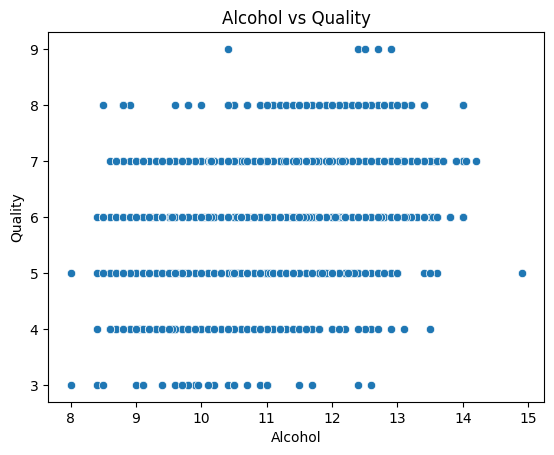

In [149]:
#graficos multivariados
df['type'] = df['type'].cat.codes

#mapa de calor de las variavles
corr_numerico = df.corr()  # Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_numerico, annot=True)
plt.title('Matriz de correlación')
plt.show()

#alcohol vs quality
sns.scatterplot(data=df, x='alcohol', y='quality')
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

**Implementación de Modelos**

In [150]:
#Modelos de Clasificación

X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#logistic regression
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train, y_train)

y_pred_LR = modelo_LR.predict(X_test)

#K_Nearest Neighbors (KNN)
parametros = {'n_neighbors': range(1, 30)}

modelo_KNN = KNeighborsClassifier()
busqueda = GridSearchCV(estimator=modelo_KNN, param_grid=parametros, cv=5, scoring='accuracy')
busqueda.fit(X_train, y_train)

mejor_neighbors = busqueda.best_params_['n_neighbors']


modelo_KNN = KNeighborsClassifier(n_neighbors=mejor_neighbors)
modelo_KNN.fit(X_train, y_train)

y_pred_KNN = modelo_KNN.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [151]:
# Evaluación de los Modelos
#Regresion Logistica
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
f1_LR = f1_score(y_test, y_pred_LR, average='weighted')

# K-Nearest Neighbors
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN, average='weighted')
recall_KNN = recall_score(y_test, y_pred_KNN, average='weighted')
f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')



print("\nRendimiento de la Regresión Logística:")
print(f"Accuracy: {accuracy_LR:.4f}")
print(f"Precision: {precision_LR:.4f}")
print(f"Recall: {recall_LR:.4f}")
print(f"F1-score: {f1_LR:.4f}")

print("\nRendimiento de K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_KNN:.4f}")
print(f"Precision: {precision_KNN:.4f}")
print(f"Recall: {recall_KNN:.4f}")
print(f"F1-score: {f1_KNN:.4f}")



Rendimiento de la Regresión Logística:
Accuracy: 0.5385
Precision: 0.4862
Recall: 0.5385
F1-score: 0.4903

Rendimiento de K-Nearest Neighbors:
Accuracy: 0.4615
Precision: 0.4012
Recall: 0.4615
F1-score: 0.4143


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Conclusión:**

La Regresión Logística funciona mejor que KNN para
este dataset. Tiene un accuracy, precision, y F1-score más altos, lo que significa que es más precisa y equilibrada al hacer predicciones.

KNN no lo hizo tan bien, probablemente porque es más sensible a la escala de los datos y necesita una selección adecuada de parámetros para funcionar mejor.

# **Posibles mejoras:**
Escalar los datos: Escalar las características con StandardScaler o MinMaxScaler puede mejorar el desempeño de KNN.

Reducir dimensionalidad: se podria usar PCA para reducir el número de características puede acelerar y mejorar el rendimiento.